In [1]:
import collections
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import msprime
import networkx as nx
import numpy as np


# useful scripts are in the 'utils' dir
sys.path.append("../utils")
import convert
import ts_process
import argdraw

In [26]:
#relatively large example
ts = msprime.sim_ancestry(8, sequence_length=1e5, population_size=1e4, record_full_arg=True, random_seed=12, recombination_rate=1e-8)
ts_arg = ts_process.convert_to_single_rec_node(ts)
ts_arg = ts_process.add_individuals_to_coalescence_nodes(ts_arg) # optional - can help if simplifying away rRE and CA nodes

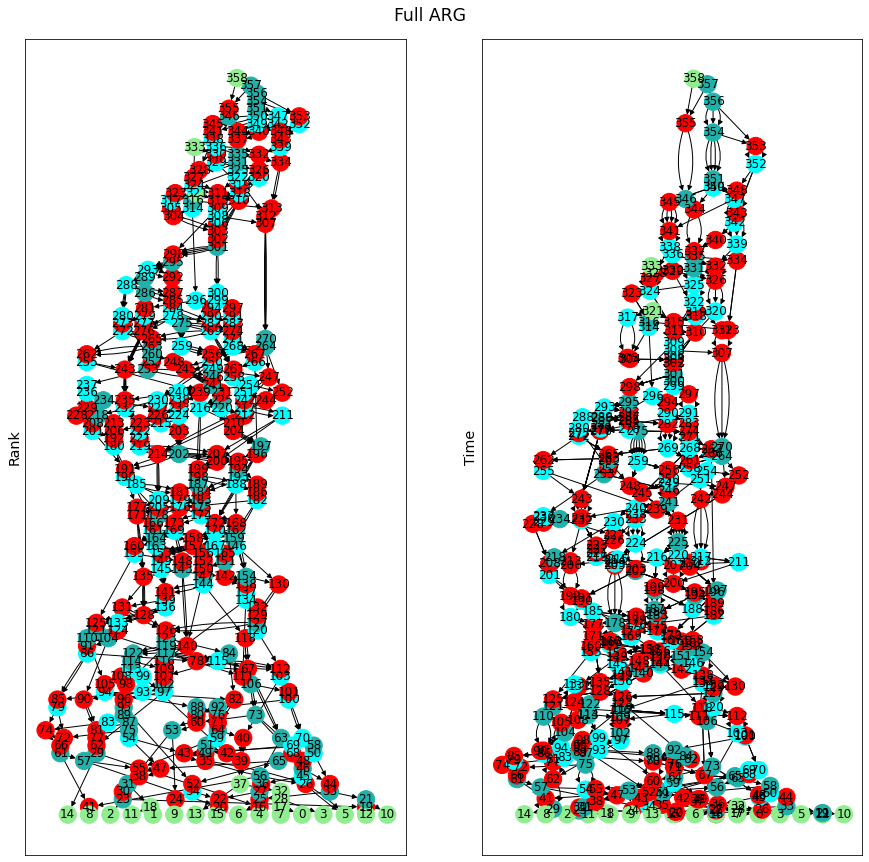

In [27]:
ts_arg = ts_process.flag_unary_nodes(ts_arg)
G = ts_process.to_networkx_graph(ts_arg)

colour_map = argdraw.nx_ts_colour_map(G)
pos = argdraw.nx_get_dot_pos(G)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
plt.suptitle("Full ARG", y=0.91, size='xx-large')

plt.sca(ax1)
argdraw.nx_draw_with_curved_multi_edges(G, pos, colour_map, 20)
ax1.set_ylabel("Rank", size='x-large')

plt.sca(ax2)
pos_with_proper_times = {}
for node_id, attrs in G.nodes(data=True):
    pos_with_proper_times[node_id] = [pos[node_id][0], np.log(attrs["time"]+100000)]
argdraw.nx_draw_with_curved_multi_edges(G, pos_with_proper_times, colour_map, 0.01)
ax2.set_ylabel("Time", size='x-large')
plt.show()



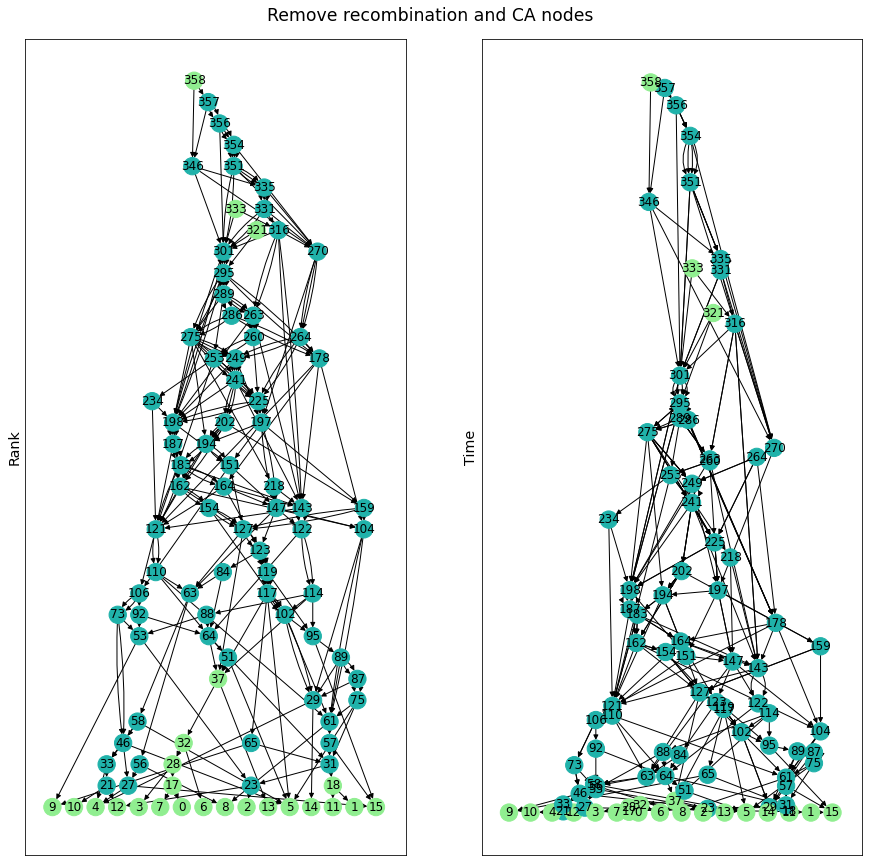

In [28]:
new_ts, node_map = ts_arg.simplify(map_nodes=True, keep_unary_in_individuals=True)
labels={node_map[u.id]: u.id for u in ts_arg.nodes() if node_map[u.id] >= 0}
new_ts = ts_process.flag_unary_nodes(new_ts) # need to re-flag

G = ts_process.to_networkx_graph(new_ts)
colour_map = argdraw.nx_ts_colour_map(G)
pos = argdraw.nx_get_dot_pos(G)    


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
plt.suptitle("Remove recombination and CA nodes", y=0.91, size='xx-large')

plt.sca(ax1)
argdraw.nx_draw_with_curved_multi_edges(G, pos, colour_map, 20, node_labels=labels)
ax1.set_ylabel("Rank", size='x-large')

plt.sca(ax2)
pos_with_proper_times = {}
for node_id, attrs in G.nodes(data=True):
    pos_with_proper_times[node_id] = [pos[node_id][0], np.log(attrs["time"]+100000)]
argdraw.nx_draw_with_curved_multi_edges(G, pos_with_proper_times, colour_map, 0.01, node_labels=labels)
ax2.set_ylabel("Time", size='x-large')
plt.show()

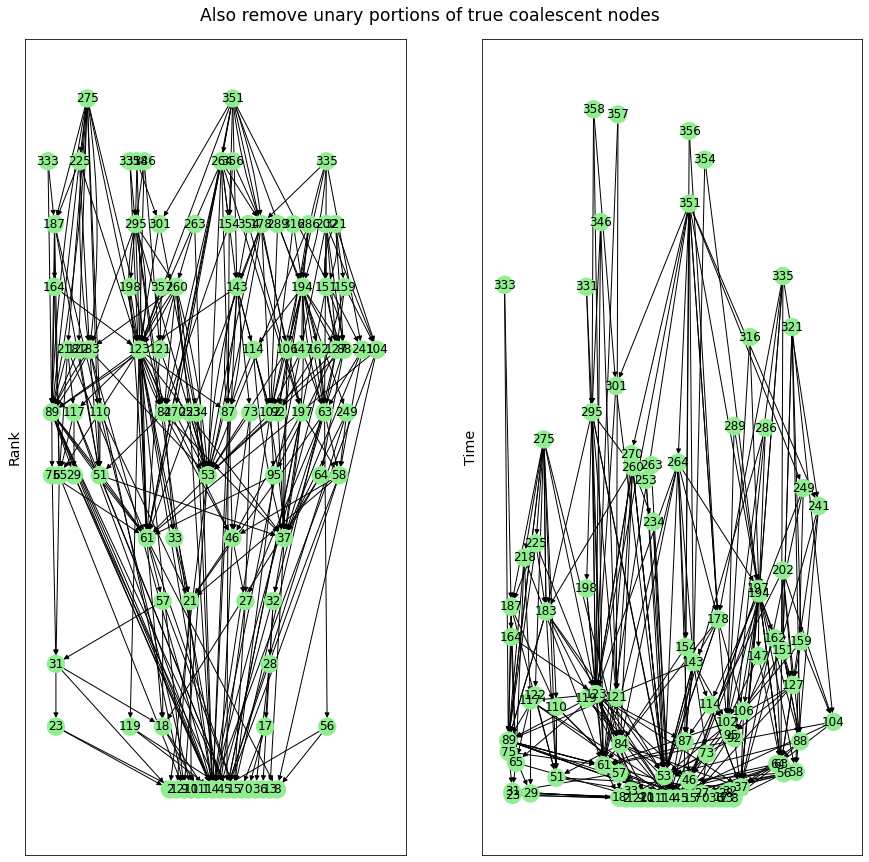

In [29]:
new_ts, node_map = ts_arg.simplify(map_nodes=True, keep_unary_in_individuals=False)
labels={node_map[u.id]: u.id for u in ts_arg.nodes() if node_map[u.id] >= 0}
new_ts = ts_process.flag_unary_nodes(new_ts) # need to re-flag

G = ts_process.to_networkx_graph(new_ts)
colour_map = argdraw.nx_ts_colour_map(G)
pos = argdraw.nx_get_dot_pos(G)    


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
plt.suptitle("Also remove unary portions of true coalescent nodes", y=0.91, size='xx-large')

plt.sca(ax1)
argdraw.nx_draw_with_curved_multi_edges(G, pos, colour_map, 20, node_labels=labels)
ax1.set_ylabel("Rank", size='x-large')

plt.sca(ax2)
pos_with_proper_times = {}
for node_id, attrs in G.nodes(data=True):
    pos_with_proper_times[node_id] = [pos[node_id][0], np.log(attrs["time"]+100000)]
argdraw.nx_draw_with_curved_multi_edges(G, pos_with_proper_times, colour_map, 0.01, node_labels=labels)
ax2.set_ylabel("Time", size='x-large')
plt.show()